## BlackSheep Cookbook Serous Analysis

The Black Sheep Analysis allows researchers to find trends in abnormal protein enrichment among patients in CPTAC datasets. In this Cookbook, we will go through the steps needed to perform a full Black Sheep Analysis, to answer a research question, of if BMI, age, or country of origin play a role in protein enrichments for patients with Endometrial Cancer.

### Step 1a: Import Dependencies
First, import the necessary dependencies and load Endometrial datasets.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cptac
import binarization_functions as bf
import blackSheepCPTACmoduleCopy as blsh
en = cptac.Endometrial()

Checking that data files are up-to-date...
100% [..................................................................................] 649 / 649
Data check complete.
endometrial data version: 2.1

Loading acetylproteomics data...
Loading clinical data...
Loading CNA data...
Loading definitions data...
Loading miRNA data...
Loading phosphoproteomics_gene data...
Loading phosphoproteomics_site data...
Loading proteomics data...
Loading somatic data...
Loading somatic_binary data...
Loading transcriptomics_circular data...
Loading transcriptomics_linear data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but analysis may not be
published until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter cptac.embargo() to open the webpage for more details.


## Step 1b: Load Data and Choose Omics Table

In [18]:
phospho = en.get_phosphoproteomics()
clinical = en.get_clinical()

In [19]:
#Append Genomics_subtype and MSI_status to en.get_clinical()
df= en.get_derived_molecular()
#clinical['Genomics_subtype'] = df['Genomics_subtype']
clinical['MSI_status'] = df['MSI_status']

## Step 2: Determine what attributes you would like to A/B test. 
For this analysis, we will be testing Histologic_type Serous vs. Endometriod in the phosphoproteomics dataset.

In [20]:
#Create a subset copy of the orignial Clinical DataFrame.
annotations = pd.DataFrame(clinical['Histologic_type'].copy())

## Step 3: Perform outliers analysis

In [21]:
outliers = blsh.make_outliers_table(phospho, iqrs=1.5, 
                                    up_or_down='up', 
                                    aggregate=False, 
                                    frac_table=False)

## Step 4: Wrap your A/B test into the outliers analysis, and create a table

In [22]:
results = blsh.compare_groups_outliers(outliers, 
                                       annotations, 
                                       frac_filter=0.3)

No rows had outliers in at least 0.3 of Histologic_type Endometrioid samples
Testing 504 rows for enrichment in Histologic_type Serous samples


Since many of the return values from compare_groups_outliers are NaN, we will drop the unecessary values here.

In [23]:
results = results.dropna(axis=0, how='all')

## Step 5: Visualize these enrichments

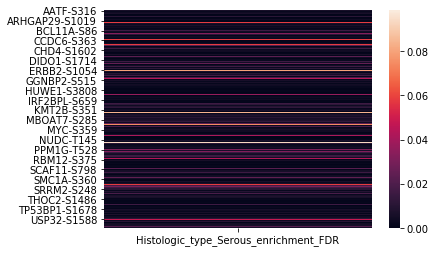

In [24]:
sns.heatmap(results)
plt.show()

## Step 6: Determine significant enrichments, and link with cancer drug database.

In [26]:
#Check for significant columns
for col in results.columns:
    bf.significantEnrichments(results, col)

485 significant protein enrichments in Histologic_type_Serous



In [27]:
#Store the dataframe of significant enrichments
column = 'Histologic_type_Serous_enrichment_FDR'
sig_results = bf.significantEnrichments(results, column)

485 significant protein enrichments in Histologic_type_Serous



As mentioned in our paper, we see a significant upregulation in TP53BP1-S1763 and CHEK2-S163 within the phosphoproteomics dataset for patients with Serous tumors.

In [28]:
print('TP53BP1-S1763' in sig_results.index)
print('CHEK2-S163' in sig_results.index)
sig_results.head()

True
True


,Histologic_type_Serous_P_values
AATF-S316,0.000931
ABCC5-S505,0.005951
ACACA-S62,0.000300
ACACA-S66,0.002108
ACAP2-S379,0.000729
